**Делаем краткий обзор данных:** смотрим, какие есть стобцы, какого типа данные и нет ли пропущенных значений

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

math = pd.read_csv('C:/Users/Xiaomi/Downloads/stud_math.csv')
math.describe(include=['O'])
math.isna().sum()
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Заполняем модой все незаполненные ячейки

In [6]:
def inmode(col):
    math[col] = math[col].fillna(math[col].mode()[0])
columns = math.columns
for col in columns:
    inmode(col)
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

In [7]:
# ищем выбросы - получаем в результате обновленный датасет - new_math, в котором удалены выбросы
new_math = math

def outliers(col):
    median = math[col].median()
    IQR = math[col].quantile(0.75) - math[col].quantile(0.25)
    perc25 = math[col].quantile(0.25)
    perc75 = math[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
              , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    new_math = math.loc[math[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] 
    
  
for col in columns:
    if (math[col].dtype == 'int64') or (math[col].dtype == 'float64'):
        outliers(col)
new_math  

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].
25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [8]:
new_math = math
new_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


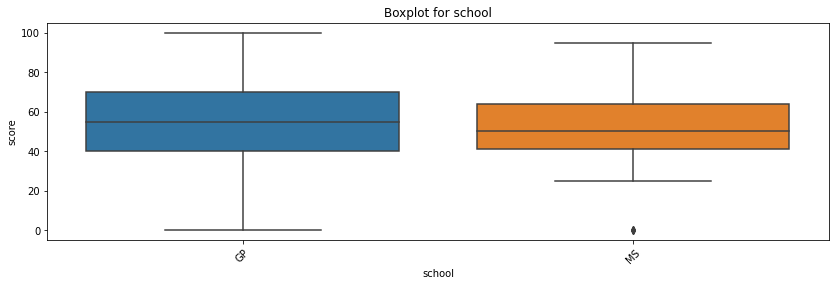

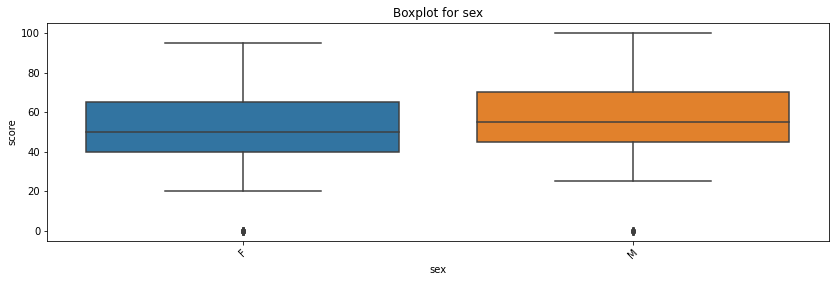

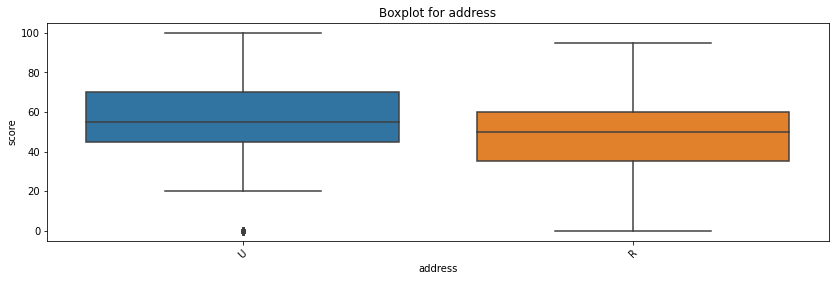

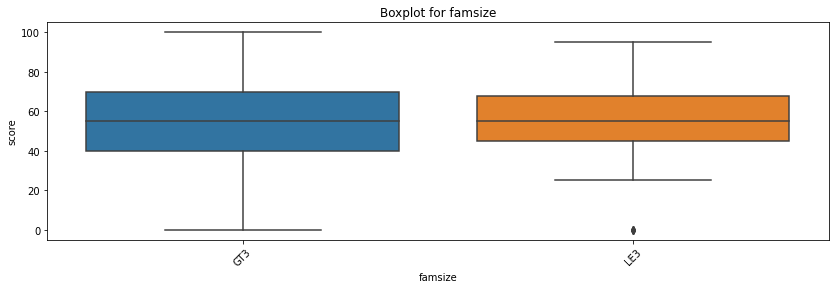

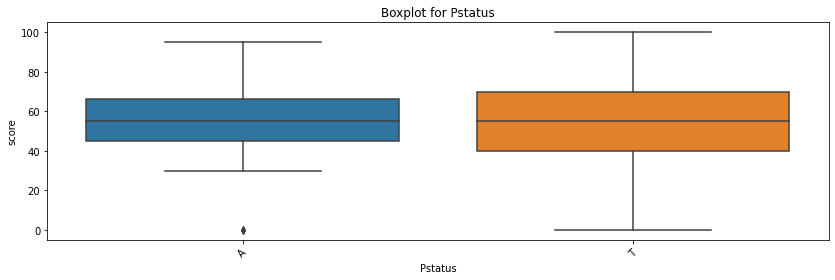

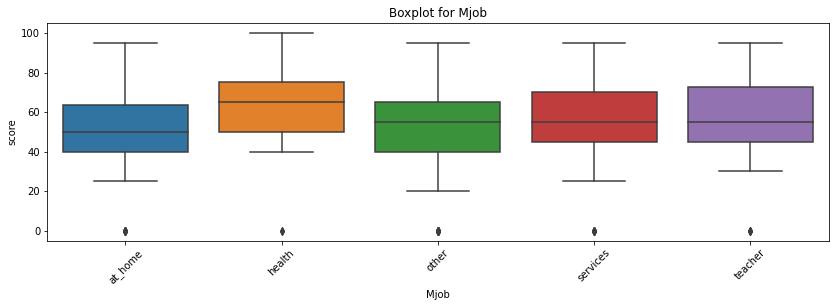

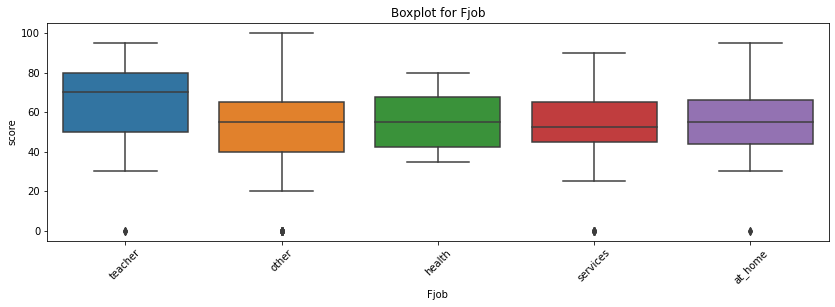

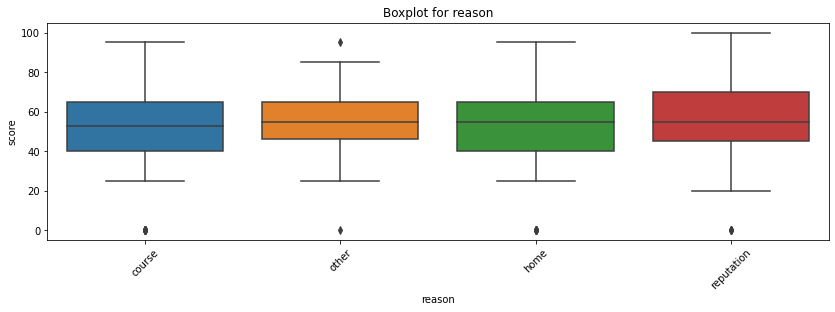

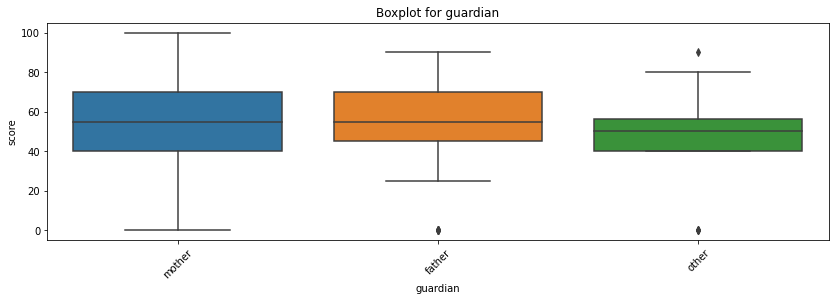

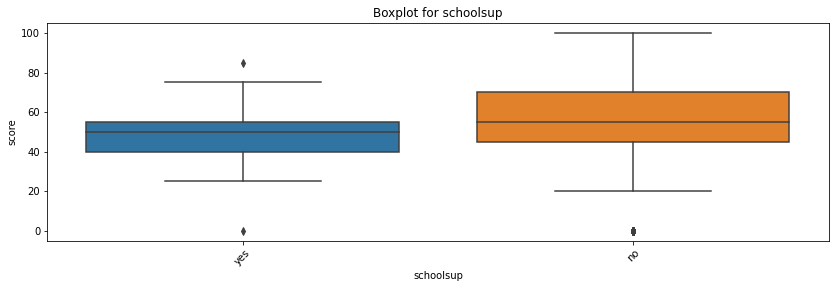

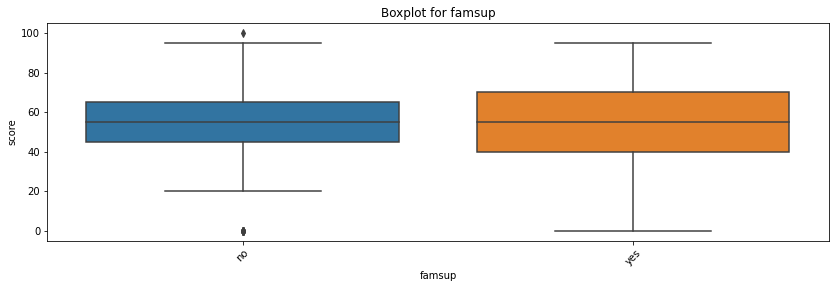

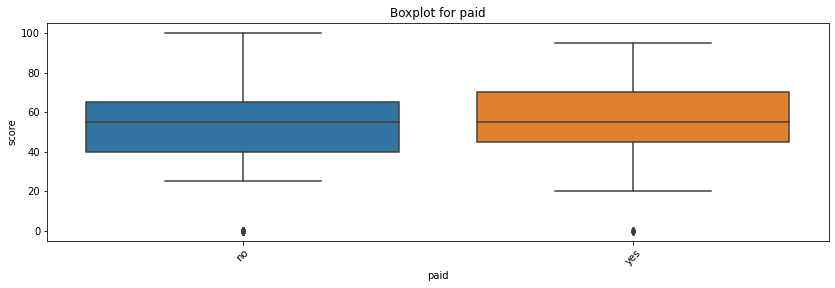

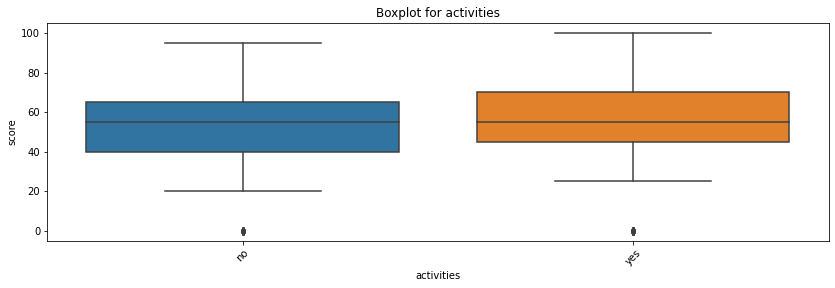

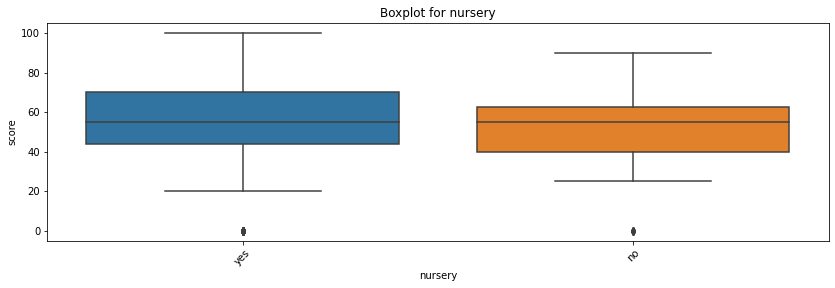

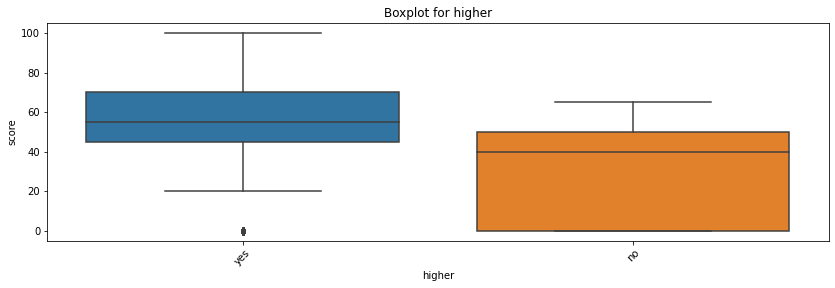

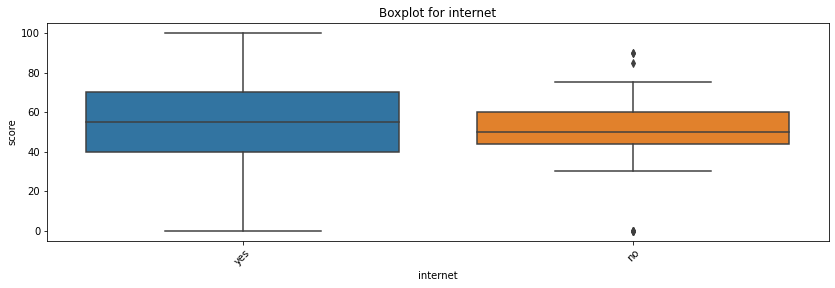

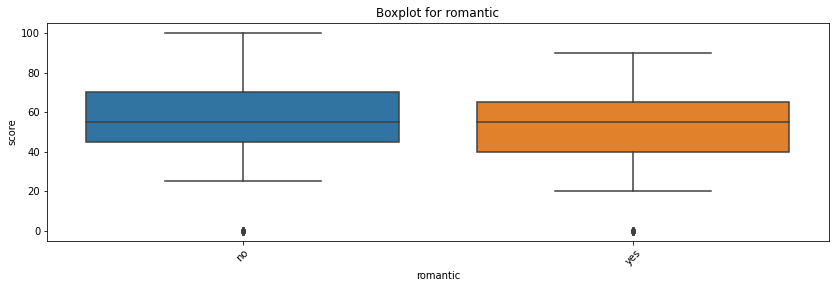

In [10]:
# анализ номинативных переменных

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=new_math.loc[new_math.loc[:, column].isin(new_math.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

new_columns = new_math.columns
for col in new_columns:
    if new_math[col].dtype == 'object':
        get_boxplot(col)

Проведем верхнеуровневый анализ по boxplots:  
 **school**: 'GP' vs 'MS'   
  максимальное значение первой и второй школы не особо отличается, зато минимальный балл первой школы гораздо ниже, чем у второй. Медиана у второй школы чуть ниже и вцелом баллы учеников второй школы более равномерны) с чем это связано сложно сказать, нужно либо исключать этот показатель из выборки, либо копать глубже в данные об учителях, директоре, уровне токсичности и т.д.  
 **sex**: F vs M 
  максимальный, минимальный, медианный балл, а также показатель первого и третьего класса у представителей мужского пола выше, чем у представителей женского (не намного! - кричит моя внутренняя феминистка)   
   **address**: U vs R
  кажется, что все показатели ребят из районов чуть ниже, чем у ребят из города  
  **famsize**: GT3 vs LE3
   медиана одинакова, но минимальный показатель ребят из менее наполненных семей выше чем у ребят из многодетных, я бы выкинула этот показатель из расчетов  
    **Pstatus**: A vs T
     разброс показателей у детей с вместе живущими родителями гораздо больше, но медиана и квантили примерно одинаковы, тоже можно выкинуть   
    **Mjob**: 
    в глаза бросается проседание в баллах у детей, чьи мамы тусуют дома и возвышение тех, чьи мамы работают в сфере здравоохранения  
    **Fjob**:  
    тут больше заметен рост ребят, у которых отцы учителя  
    **reason**:  
    что влияло на выбор школы -- образовательная программа немного отстает, а репутация чуть выше 
    **guardian**: 
    кажется, что если опекуном является не мать и не отец, то баллы ребенка ощутимо ниже  
    **schoolsup**:  
    прикольно, по боксплоту кажется, что отсутствие доп образовательной поддержки позитивно влияет на баллы)  
    **famsup**: 
    а наличие поддержки семьи не влияет на медианный показатель, но размазывает данные  
    **paid**:  
    наличие репетиторов не влияет на медиану, но поднимает квантили  
    **activities**:  
    то же самое, что с paid  
    **nursery**:  
    опять таки, складывается ощущение, что от посещения детского сада квантили возрастают, но медиана практически одинакова  
    **higher**:  
    ну тут здравый смысл подсказывает, да и боксплоты не врут (я надеюсь), что желание идти в вышку повышает количество баллов, причем достаточно драматично  
    **internet**:  
    ребята без домашнего интернета учатся чуть хуже и чуть более одинаково, чем ребята с интернетом)
    **romantic**  
    боксплот показывает, что в среднем ребята с отношениями учатся примерно также, как одиночки, но оба квантиля чуть ниже, как и максимум и минимум

In [26]:
# сделаем все по науке -- проверим тестом Стьюдента
def get_stat_dif(column, target):
    cols = new_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pv = ttest_ind(new_math.loc[new_math.loc[:, column] == comb[0], target].dropna(), 
                        new_math.loc[new_math.loc[:, column] == comb[1], target].dropna()).pvalue
        if pv <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school','sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'Medu','Fedu','reason', 'schoolsup', 
            'famsup', 'paid', 'activities','nursery', 'higher','internet', 'famrel','traveltime','studytime','failures',
            'freetime','health','goout','romantic']: 
    get_stat_dif(col, 'score')


Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки romantic


Итак, нашли статистически значимые различия для 7 колонок: sex, address, Mjob, Medu, higher, failures, romantic -- это значит, что их значения влияют на конечный результат и мы скорее всего будем использовать эти данные для построения модели

**Коррелляционный анализ**   
Делаем для супер числовых переменных - возраста, количества пропущенных занятий - для уровня баллов


In [14]:
math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.090515,-0.155013
absences,0.090515,1.000000,0.061142
score,-0.155013,0.061142,1.000000


Кажется, тут нельзя сделать никаких вразумительных выводов кроме того, что чем человек старше, тем меньше баллы, и чем больше пропусков, тем выше балл (звучит абсурдно, впрочем, цифры незначительные). Но все равно странно

In [28]:
math_model = new_math[['sex', 'address', 'Mjob', 'Medu', 'higher', 'failures', 'romantic']]
math_model

,sex,address,Mjob,Medu,higher,failures,romantic
0,F,U,at_home,4.0,yes,0.0,no
1,F,U,at_home,1.0,yes,0.0,no
2,F,U,at_home,1.0,yes,3.0,no
3,F,U,health,4.0,yes,0.0,yes
4,F,U,other,3.0,yes,0.0,no
...,...,...,...,...,...,...,...
390,M,U,services,2.0,yes,2.0,no
391,M,U,services,3.0,yes,0.0,no
392,M,R,other,1.0,yes,3.0,no
393,M,R,services,3.0,yes,0.0,no


 **Итоги**  
 Что мы сделали: для каждого столбца заполнили модой все незаполненные ячейки, чтобы лишего не удалять. Во многих местах нужно было скорее придумать, как заполнить их по умному, но в качестве тренировки пренебрегли этим моментом  
 Для каждого стобца нашли выбросы и сделали новый датасет без выбросов и с заполненными ячейками new_math, на основе которого провели кор анализ  
 В результате анализа номинативных переменных и ttest установили основные колонки, на которых будем опираться при построении модели sex, address, Mjob, Medu, higher, failures, romantic и вывели их в отдельный датасет math_model  
 В качестве результата кор анализа выяснили, что результаты лучше у более молодых учеников. 